# Future Engineering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from boruta import boruta_py
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from lightgbm import LGBMRegressor
sns.set()
import pickle
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)
%matplotlib inline

In [2]:
train_data = pd.read_csv('train_data_no_missing_values.csv')
test_data = pd.read_csv('test_data_no_missing_values.csv')

### Numerical data

In [3]:
train_data[[col for col in train_data.columns if train_data[col].dtypes != 'O']]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,PriceSales
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,642.0,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.0,3.0,836.0,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0.0,0.0,953.0,953.0,953,694,0,1647,0.0,0.0,2,1,3,1,7,1,1999.0,2.0,460.0,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790.0,163.0,589.0,1542.0,2073,0,0,2073,1.0,0.0,2,0,3,1,7,2,1978.0,2.0,500.0,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275.0,0.0,877.0,1152.0,1188,1152,0,2340,0.0,0.0,2,0,4,1,9,2,1941.0,1.0,252.0,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49.0,1029.0,0.0,1078.0,1078,0,0,1078,1.0,0.0,1,0,2,1,5,0,1950.0,1.0,240.0,366,0,112,0,0,0,0,4,2010,142125


# Feature selection

In [4]:
#checking features correlation
corr = train_data.corr()

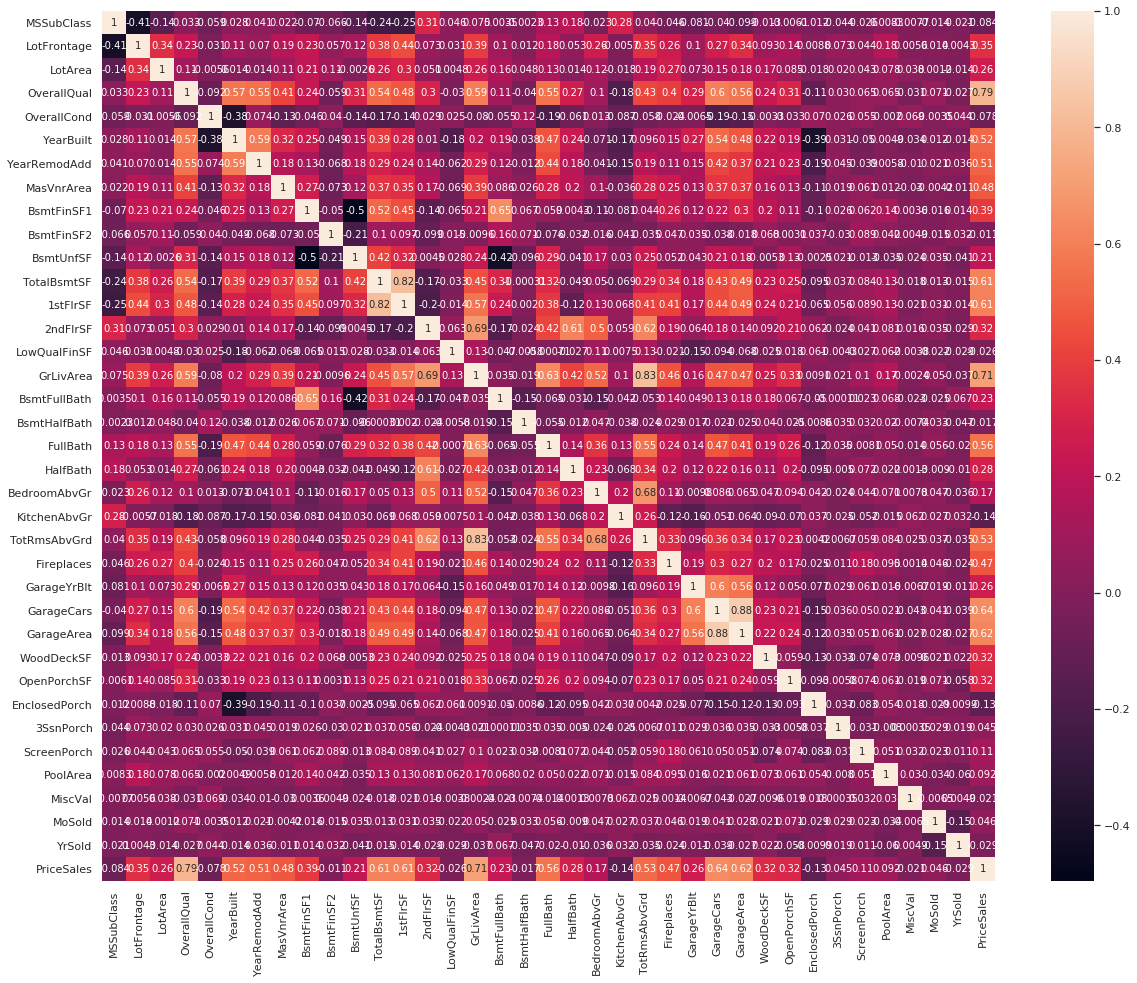

In [5]:
plt.figure(figsize=[20,16])
sns.heatmap(corr, annot=True)
plt.show()

In [6]:
num_features = ['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 
                'BsmtFinSF1', '1stFlrSF', 'TotalBsmtSF', 'BsmtUnfSF', '2ndFlrSF', 'GrLivArea', 
                'FullBath', 'Fireplaces', 'GarageArea', 'GarageCars']

In [7]:
#correlation of selected features
corr2 = train_data[num_features+['PriceSales']].corr()

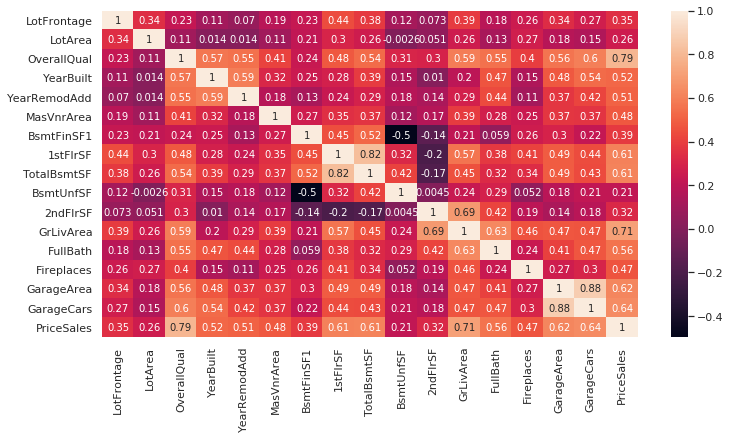

In [8]:
plt.figure(figsize=[12,6])
sns.heatmap(corr2, annot=True)
plt.show()

Selected numerical features<br>
1) LotFrontage<br>
2) MasVnrArea<br>
3) TotalBsmtSF<br>
4) GrLivArea<br>
5) GarageCars <br>
6) OverallQual <br>
7) YearBuilt<br>
8) YearRemodAdd	<br>
9) Fireplaces <br>
10) FullBath <br>
11) Lot Area <br>
12) BsmtFinSF1

In [9]:
num_selected = ['LotFrontage', 'MasVnrArea', 'LotArea', 'BsmtFinSF1', 'TotalBsmtSF', 'GrLivArea', 'GarageCars', 
                'OverallQual', 'YearBuilt', 'YearRemodAdd', 'Fireplaces', 'FullBath']
cat_features = [cat for cat in train_data.columns if train_data[cat].dtypes == 'O']
len(cat_features)

43

In [10]:
train_data[cat_features]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,None,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
1,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
2,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
3,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,None,None,None,WD,Abnorml
4,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
1456,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,TA,Attchd,Unf,TA,TA,Y,None,MnPrv,None,WD,Normal
1457,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,None,GdPrv,Shed,WD,Normal
1458,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,Y,FuseA,Gd,Typ,None,Attchd,Unf,TA,TA,Y,None,None,None,WD,Normal


In [11]:
cat_ordinal = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
               'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond',
               'PoolQC', 'Fence']

**Copying and processing data to perform wrapper feature selection method**

In [12]:
experiment_data = train_data[num_selected + cat_features +['PriceSales']]

In [13]:
for col in cat_ordinal:
    experiment_data[col] = experiment_data[col].astype(str)

In [14]:
for col in cat_ordinal:
    lbl_encode = LabelEncoder()
    lbl_encode.fit(experiment_data[col])
    experiment_data[col] = lbl_encode.transform(experiment_data[col])

In [15]:
experiment_data

,LotFrontage,MasVnrArea,LotArea,BsmtFinSF1,TotalBsmtSF,GrLivArea,GarageCars,OverallQual,YearBuilt,YearRemodAdd,Fireplaces,FullBath,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,PriceSales
0,65.0,196.0,8450,706.0,856.0,1710,2.0,7,2003,2003,0,2,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,2,4,PConc,2,4,3,2,6,GasA,0,Y,SBrkr,2,Typ,3,Attchd,RFn,5,5,Y,3,4,None,WD,Normal,208500
1,80.0,0.0,9600,978.0,1262.0,1262,2.0,6,1976,1976,1,2,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,3,4,CBlock,2,4,1,0,6,GasA,0,Y,SBrkr,3,Typ,5,Attchd,RFn,5,5,Y,3,4,None,WD,Normal,181500
2,68.0,162.0,11250,486.0,920.0,1786,2.0,7,2001,2002,1,2,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,2,4,PConc,2,4,2,2,6,GasA,0,Y,SBrkr,2,Typ,5,Attchd,RFn,5,5,Y,3,4,None,WD,Normal,223500
3,60.0,0.0,9550,216.0,756.0,1717,3.0,7,1915,1970,1,1,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,3,4,BrkTil,4,1,3,0,6,GasA,2,Y,SBrkr,2,Typ,2,Detchd,Unf,5,5,Y,3,4,None,WD,Abnorml,140000
4,84.0,350.0,14260,655.0,1145.0,2198,3.0,8,2000,2000,1,2,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,2,4,PConc,2,4,0,2,6,GasA,0,Y,SBrkr,2,Typ,5,Attchd,RFn,5,5,Y,3,4,None,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,0.0,7917,0.0,953.0,1647,2.0,6,1999,2000,1,2,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,3,4,PConc,2,4,3,6,6,GasA,0,Y,SBrkr,3,Typ,5,Attchd,RFn,5,5,Y,3,4,None,WD,Normal,175000
1456,85.0,119.0,13175,790.0,1542.0,2073,2.0,6,1978,1988,2,2,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,3,4,CBlock,2,4,3,0,5,GasA,4,Y,SBrkr,3,Min1,5,Attchd,Unf,5,5,Y,3,2,None,WD,Normal,210000
1457,66.0,0.0,9042,275.0,1152.0,2340,1.0,7,1941,2006,2,2,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,0,2,Stone,4,1,3,2,6,GasA,0,Y,SBrkr,2,Typ,2,Attchd,RFn,5,5,Y,3,0,Shed,WD,Normal,266500
1458,68.0,0.0,9717,49.0,1078.0,1078,1.0,5,1950,1996,0,1,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,3,4,CBlock,4,4,2,2,5,GasA,2,Y,FuseA,2,Typ,3,Attchd,Unf,5,5,Y,3,4,None,WD,Normal,142125


### Relevant features selection by using Wrapper method

In [19]:
gb_model = GradientBoostingRegressor()
feature_selector = boruta_py.BorutaPy(gb_model, n_estimators='auto', verbose=2, max_iter=120)

In [20]:
no_dummies = pd.get_dummies(experiment_data.drop('PriceSales', axis=1))
x = np.array(no_dummies)
y = np.array(experiment_data['PriceSales'])

In [21]:
feature_selector.fit(x,y)

Iteration: 	1 / 120
Confirmed: 	0
Tentative: 	218
Rejected: 	0
Iteration: 	2 / 120
Confirmed: 	0
Tentative: 	218
Rejected: 	0
Iteration: 	3 / 120
Confirmed: 	0
Tentative: 	218
Rejected: 	0
Iteration: 	4 / 120
Confirmed: 	0
Tentative: 	218
Rejected: 	0
Iteration: 	5 / 120
Confirmed: 	0
Tentative: 	218
Rejected: 	0
Iteration: 	6 / 120
Confirmed: 	0
Tentative: 	218
Rejected: 	0
Iteration: 	7 / 120
Confirmed: 	0
Tentative: 	218
Rejected: 	0
Iteration: 	8 / 120
Confirmed: 	0
Tentative: 	25
Rejected: 	193
Iteration: 	9 / 120
Confirmed: 	6
Tentative: 	19
Rejected: 	193
Iteration: 	10 / 120
Confirmed: 	6
Tentative: 	19
Rejected: 	193
Iteration: 	11 / 120
Confirmed: 	6
Tentative: 	19
Rejected: 	193
Iteration: 	12 / 120
Confirmed: 	7
Tentative: 	11
Rejected: 	200
Iteration: 	13 / 120
Confirmed: 	7
Tentative: 	11
Rejected: 	200
Iteration: 	14 / 120
Confirmed: 	7
Tentative: 	11
Rejected: 	200
Iteration: 	15 / 120
Confirmed: 	7
Tentative: 	11
Rejected: 	200
Iteration: 	16 / 120
Confirmed: 	8
Tentat

BorutaPy(alpha=0.05,
         estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                             criterion='friedman_mse',
                                             init=None, learning_rate=0.1,
                                             loss='ls', max_depth=3,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=176,
                                             n_iter_no_change=None,
                                             presort='deprecated',
                 

In [22]:
no_dummies.columns[feature_selector.support_.tolist()]

Index(['LotFrontage', 'LotArea', 'BsmtFinSF1', 'TotalBsmtSF', 'GrLivArea',
       'GarageCars', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'Fireplaces',
       'FullBath', 'BsmtQual', 'KitchenQual'],
      dtype='object')

In [23]:
selected_features = no_dummies.columns[feature_selector.support_.tolist()].tolist()

I used wrapper method to select features but wrapper method more prone to overfit model so i'll include some important categorical features to generalize model.

In [24]:
for fea in cat_ordinal:
    if fea in selected_features:
        print(fea,'Yes')

BsmtQual Yes
KitchenQual Yes


In [26]:
#final selected features
selected_features = selected_features + ['GarageQual', 'ExterQual', 'HouseStyle', 'RoofStyle', 'Neighborhood']

# Final data preparation for modeling

## Checking Outliers

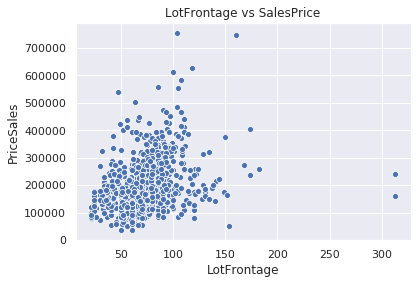

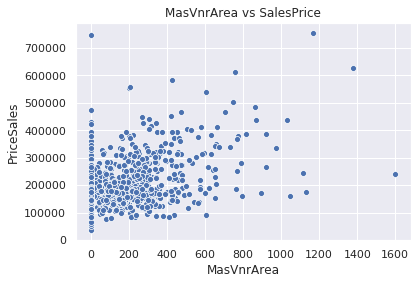

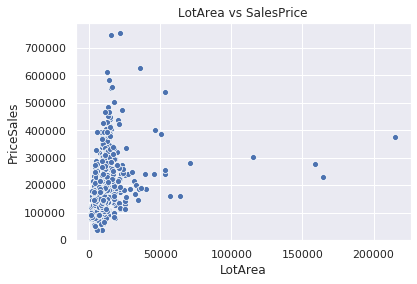

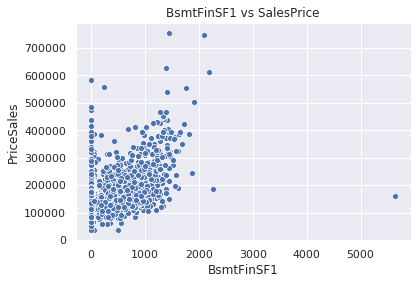

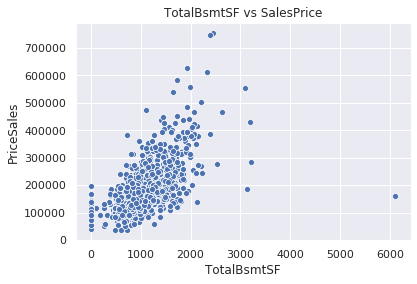

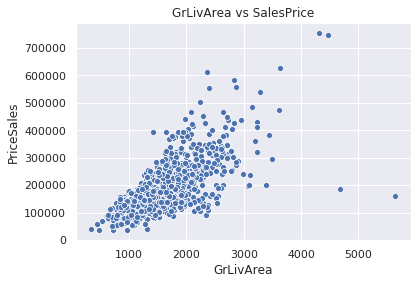

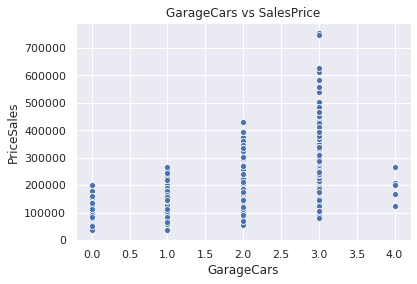

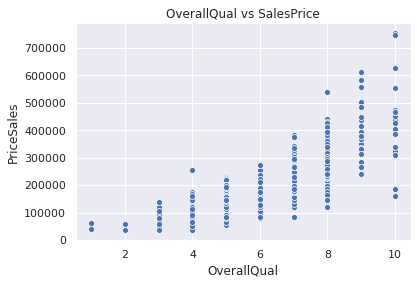

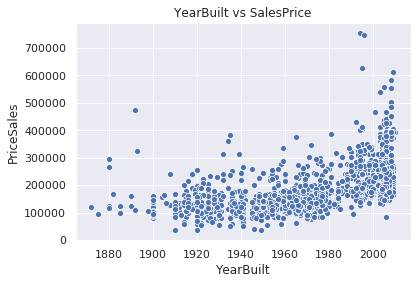

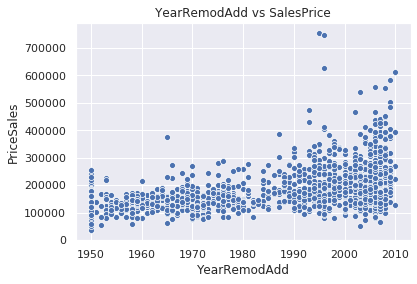

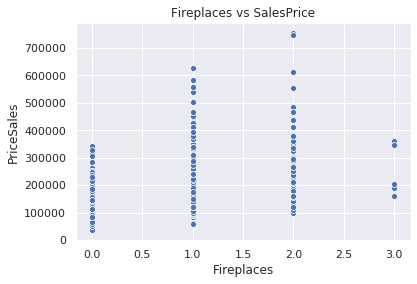

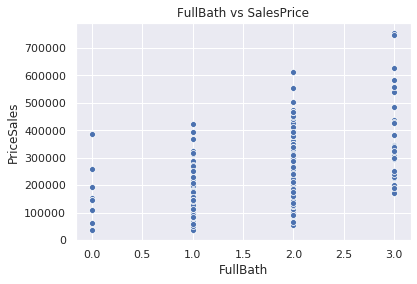

In [27]:
for col in num_selected:
    sns.scatterplot(x=experiment_data[col], y=experiment_data['PriceSales'])
    plt.title(f'{col} vs SalesPrice')
    plt.show()

### Removing Outliers

In [28]:
train_data = train_data.drop(train_data[(train_data['LotFrontage']>300) & (train_data['PriceSales'] < 300000)].index)
train_data = train_data.drop(train_data[(train_data['TotalBsmtSF']>6000) & (train_data['PriceSales'] < 200000)].index)
train_data = train_data.drop(train_data[(train_data['GrLivArea']>4000) & (train_data['PriceSales']<300000)].index)

In [29]:
train_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,PriceSales
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,953.0,953.0,GasA,Ex,Y,SBrkr,953,694,0,1647,0.0,0.0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2.0,460.0,TA,TA,Y,0,40,0,0,0,0,None,None,None,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790.0,Rec,163.0,589.0,1542.0,GasA,TA,Y,SBrkr,2073,0,0,2073,1.0,0.0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2.0,500.0,TA,TA,Y,349,0,0,0,0,0,None,MnPrv,None,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275.0,Unf,0.0,877.0,1152.0,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0.0,0.0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1.0,252.0,TA,TA,Y,0,60,0,0,0,0,None,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAme

## Data Transformation

In [30]:
sales_price = train_data['PriceSales']
all_data= pd.concat([train_data.drop('PriceSales', axis=1), test_data])

In [31]:
all_data = all_data[[col for col in all_data.columns if col in selected_features]]

In [32]:
all_data

,LotFrontage,LotArea,Neighborhood,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,ExterQual,BsmtQual,BsmtFinSF1,TotalBsmtSF,GrLivArea,FullBath,KitchenQual,Fireplaces,GarageCars,GarageQual
0,65.0,8450,CollgCr,2Story,7,2003,2003,Gable,Gd,Gd,706.0,856.0,1710,2,Gd,0,2.0,TA
1,80.0,9600,Veenker,1Story,6,1976,1976,Gable,TA,Gd,978.0,1262.0,1262,2,TA,1,2.0,TA
2,68.0,11250,CollgCr,2Story,7,2001,2002,Gable,Gd,Gd,486.0,920.0,1786,2,Gd,1,2.0,TA
3,60.0,9550,Crawfor,2Story,7,1915,1970,Gable,TA,TA,216.0,756.0,1717,1,Gd,1,3.0,TA
4,84.0,14260,NoRidge,2Story,8,2000,2000,Gable,Gd,Gd,655.0,1145.0,2198,2,Gd,1,3.0,TA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,21.0,1936,MeadowV,2Story,4,1970,1970,Gable,TA,TA,0.0,546.0,1092,1,TA,0,0.0,None
1455,21.0,1894,MeadowV,2Story,4,1970,1970,Gable,TA,TA,252.0,546.0,1092,1,TA,0,1.0,TA
1456,160.0,20000,Mitchel,1Story,5,1960,1996,Gable,TA,TA,1224.0,1224.0,1224,1,TA,1,2.0,TA
1457,62.0,10441,Mitchel,SFoyer,5,1992,1992,Gable,TA,Gd,337.0,912.0,970,1,TA,0,0.0,None


### Label Encoding

In [34]:
for col in ['BsmtQual', 'KitchenQual', 'GarageQual', 'ExterQual']:
    lbl = LabelEncoder()
    lbl.fit(all_data[col])
    all_data[col] = lbl.transform(all_data[col])

In [35]:
all_data.head()

,LotFrontage,LotArea,Neighborhood,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,ExterQual,BsmtQual,BsmtFinSF1,TotalBsmtSF,GrLivArea,FullBath,KitchenQual,Fireplaces,GarageCars,GarageQual
0,65.0,8450,CollgCr,2Story,7,2003,2003,Gable,2,2,706.0,856.0,1710,2,2,0,2.0,5
1,80.0,9600,Veenker,1Story,6,1976,1976,Gable,3,2,978.0,1262.0,1262,2,3,1,2.0,5
2,68.0,11250,CollgCr,2Story,7,2001,2002,Gable,2,2,486.0,920.0,1786,2,2,1,2.0,5
3,60.0,9550,Crawfor,2Story,7,1915,1970,Gable,3,4,216.0,756.0,1717,1,2,1,3.0,5
4,84.0,14260,NoRidge,2Story,8,2000,2000,Gable,2,2,655.0,1145.0,2198,2,2,1,3.0,5


### Normalizinig / Scaling

### Min Max

In [47]:
min_scale = MinMaxScaler()

In [49]:
scale_data = all_data[[col for col in all_data.columns if all_data[col].dtypes != 'O']]
scale_data = min_scale.fit_transform(scale_data)

In [50]:
scale_data = pd.DataFrame(scale_data, columns=[col for col in all_data.columns if all_data[col].dtypes != 'O'])
scale_data

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,ExterQual,BsmtQual,BsmtFinSF1,TotalBsmtSF,GrLivArea,FullBath,KitchenQual,Fireplaces,GarageCars,GarageQual
0,0.245810,0.033420,0.666667,0.949275,0.883333,0.666667,0.5,0.176060,0.168008,0.289015,0.50,0.666667,0.00,0.4,1.0
1,0.329609,0.038795,0.555556,0.753623,0.433333,1.000000,0.5,0.243890,0.247694,0.194917,0.50,1.000000,0.25,0.4,1.0
2,0.262570,0.046507,0.666667,0.934783,0.866667,0.666667,0.5,0.121197,0.180569,0.304978,0.50,0.666667,0.25,0.4,1.0
3,0.217877,0.038561,0.666667,0.311594,0.333333,1.000000,1.0,0.053865,0.148381,0.290485,0.25,0.666667,0.25,0.6,1.0
4,0.351955,0.060576,0.777778,0.927536,0.833333,0.666667,0.5,0.163342,0.224730,0.391514,0.50,0.666667,0.25,0.6,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2911,0.000000,0.002973,0.333333,0.710145,0.333333,1.000000,1.0,0.000000,0.107164,0.159210,0.25,1.000000,0.00,0.0,0.6
2912,0.000000,0.002776,0.333333,0.710145,0.333333,1.000000,1.0,0.062843,0.107164,0.159210,0.25,1.000000,0.00,0.2,1.0
2913,0.776536,0.087406,0.444444,0.637681,0.766667,1.000000,1.0,0.305237,0.240236,0.186936,0.25,1.000000,0.25,0.4,1.0
2914,0.229050,0.042726,0.444444,0.869565,0.700000,1.000000,0.5,0.084040,0.178999,0.133585,0.25,1.000000,0.00,0.0,0.6


In [51]:
cat_data = all_data[[col for col in all_data.columns if all_data[col].dtypes == 'O']].reset_index(drop=True)

In [52]:
all_data = pd.concat([scale_data, cat_data], axis=1)

In [53]:
all_data.head()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,ExterQual,BsmtQual,BsmtFinSF1,TotalBsmtSF,GrLivArea,FullBath,KitchenQual,Fireplaces,GarageCars,GarageQual,Neighborhood,HouseStyle,RoofStyle
0,0.245810,0.033420,0.666667,0.949275,0.883333,0.666667,0.5,0.176060,0.168008,0.289015,0.50,0.666667,0.00,0.4,1.0,CollgCr,2Story,Gable
1,0.329609,0.038795,0.555556,0.753623,0.433333,1.000000,0.5,0.243890,0.247694,0.194917,0.50,1.000000,0.25,0.4,1.0,Veenker,1Story,Gable
2,0.262570,0.046507,0.666667,0.934783,0.866667,0.666667,0.5,0.121197,0.180569,0.304978,0.50,0.666667,0.25,0.4,1.0,CollgCr,2Story,Gable
3,0.217877,0.038561,0.666667,0.311594,0.333333,1.000000,1.0,0.053865,0.148381,0.290485,0.25,0.666667,0.25,0.6,1.0,Crawfor,2Story,Gable
4,0.351955,0.060576,0.777778,0.927536,0.833333,0.666667,0.5,0.163342,0.224730,0.391514,0.50,0.666667,0.25,0.6,1.0,NoRidge,2Story,Gable


In [54]:
#saving object for transforming inputs in deployement
pickle.dump(min_scale, open('min_max_predictor_variables.pkl', 'wb'))

In [55]:
sales_price = min_scale.fit_transform(sales_price.values.reshape(-1,1))

In [56]:
import collections
def flatten(x):
    result = []
    for el in x:
        if isinstance(x, collections.Iterable) and not isinstance(el, float):
            result.extend(flatten(el))
        else:
            result.append(el)
    return result

In [57]:
sales_price = pd.Series(flatten(sales_price.tolist()))

In [58]:
#saving object for transforming inputs in deployement

pickle.dump(min_scale, open('min_max_sales_price_target.pkl', 'wb'))

In [59]:
all_data = pd.get_dummies(all_data, drop_first=True)

In [60]:
all_data

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,ExterQual,BsmtQual,BsmtFinSF1,TotalBsmtSF,GrLivArea,FullBath,KitchenQual,Fireplaces,GarageCars,GarageQual,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed
0,0.245810,0.033420,0.666667,0.949275,0.883333,0.666667,0.5,0.176060,0.168008,0.289015,0.50,0.666667,0.00,0.4,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,0.329609,0.038795,0.555556,0.753623,0.433333,1.000000,0.5,0.243890,0.247694,0.194917,0.50,1.000000,0.25,0.4,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0
2,0.262570,0.046507,0.666667,0.934783,0.866667,0.666667,0.5,0.121197,0.180569,0.304978,0.50,0.666667,0.25,0.4,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,0.217877,0.038561,0.666667,0.311594,0.333333,1.000000,1.0,0.053865,0.148381,0.290485,0.25,0.666667,0.25,0.6,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0.351955,0.060576,0.777778,0.927536,0.833333,0.666667,0.5,0.163342,0.224730,0.391514,0.50,0.666667,0.25,0.6,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2911,0.000000,0.002973,0.333333,0.710145,0.333333,1.000000,1.0,0.000000,0.107164,0.159210,0.25,1.000000,0.00,0.0,0.6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2912,0.000000,0.002776,0.333333,0.710145,0.333333,1.000000,1.0,0.062843,0.107164,0.159210,0.25,1.000000,0.00,0.2,1.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2913,0.776536,0.087406,0.444444,0.637681,0.766667,1.000000,1.0,0.305237,0.240236,0.186936,0.25,1.000000,0.25,0.4,1.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2914,0.229050,0.042726,0.444444,0.869565,0.700000,1.000000,0.5,0.084040,0.178999,0.133585,0.25,1.000000,0.00,0.0,0.6,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0


In [61]:
final_train_data_model = all_data[:1457]
final_test_data_model = all_data[1457:]

In [62]:
final_train_data_model = pd.concat([final_train_data_model, sales_price], axis=1)

In [63]:
final_train_data_model.rename(columns={0:'PriceSales'}, inplace=True)
final_train_data_model.to_csv('final_train_data_model.csv', index=False)

In [64]:
final_test_data_model.to_csv('final_test_data_model.csv', index=False)

In [65]:
final_train_data_model

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,ExterQual,BsmtQual,BsmtFinSF1,TotalBsmtSF,GrLivArea,FullBath,KitchenQual,Fireplaces,GarageCars,GarageQual,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,PriceSales
0,0.245810,0.033420,0.666667,0.949275,0.883333,0.666667,0.5,0.176060,0.168008,0.289015,0.50,0.666667,0.00,0.4,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0.241078
1,0.329609,0.038795,0.555556,0.753623,0.433333,1.000000,0.5,0.243890,0.247694,0.194917,0.50,1.000000,0.25,0.4,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0.203583
2,0.262570,0.046507,0.666667,0.934783,0.866667,0.666667,0.5,0.121197,0.180569,0.304978,0.50,0.666667,0.25,0.4,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0.261908
3,0.217877,0.038561,0.666667,0.311594,0.333333,1.000000,1.0,0.053865,0.148381,0.290485,0.25,0.666667,0.25,0.6,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0.145952
4,0.351955,0.060576,0.777778,0.927536,0.833333,0.666667,0.5,0.163342,0.224730,0.391514,0.50,0.666667,0.25,0.6,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0.298709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,0.229050,0.030929,0.555556,0.920290,0.833333,1.000000,0.5,0.000000,0.187046,0.275782,0.50,1.000000,0.25,0.4,1.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0.194556
1453,0.357542,0.055505,0.555556,0.768116,0.633333,1.000000,0.5,0.197007,0.302650,0.365259,0.50,1.000000,0.50,0.4,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0.243161
1454,0.251397,0.036187,0.666667,0.500000,0.933333,0.000000,1.0,0.068579,0.226104,0.421340,0.50,0.666667,0.50,0.2,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0.321622
1455,0.262570,0.039342,0.444444,0.565217,0.766667,1.000000,1.0,0.012219,0.211580,0.156270,0.25,0.666667,0.00,0.2,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0.148903


In [66]:
final_test_data_model

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,ExterQual,BsmtQual,BsmtFinSF1,TotalBsmtSF,GrLivArea,FullBath,KitchenQual,Fireplaces,GarageCars,GarageQual,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed
1457,0.329609,0.048246,0.444444,0.644928,0.183333,1.000000,1.0,0.116708,0.173111,0.118042,0.25,1.000000,0.00,0.2,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1458,0.335196,0.060609,0.555556,0.623188,0.133333,1.000000,1.0,0.230175,0.260844,0.208990,0.25,0.666667,0.00,0.2,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1459,0.296089,0.058566,0.444444,0.905797,0.800000,1.000000,0.5,0.197257,0.182139,0.272002,0.50,1.000000,0.25,0.4,1.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1460,0.318436,0.040562,0.555556,0.913043,0.800000,1.000000,1.0,0.150125,0.181747,0.266751,0.50,0.666667,0.25,0.4,1.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1461,0.122905,0.017318,0.777778,0.869565,0.700000,0.666667,0.5,0.065586,0.251227,0.198698,0.50,0.666667,0.00,0.4,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2911,0.000000,0.002973,0.333333,0.710145,0.333333,1.000000,1.0,0.000000,0.107164,0.159210,0.25,1.000000,0.00,0.0,0.6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2912,0.000000,0.002776,0.333333,0.710145,0.333333,1.000000,1.0,0.062843,0.107164,0.159210,0.25,1.000000,0.00,0.2,1.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2913,0.776536,0.087406,0.444444,0.637681,0.766667,1.000000,1.0,0.305237,0.240236,0.186936,0.25,1.000000,0.25,0.4,1.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2914,0.229050,0.042726,0.444444,0.869565,0.700000,1.000000,0.5,0.084040,0.178999,0.133585,0.25,1.000000,0.00,0.0,0.6,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
